# Installs

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 29.1 MB/s eta 0:00:00


In [ ]:
pip install ucimlrepo

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import sweetviz as sv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from patsy import dmatrices
import statsmodels.api as sm

# Creating Dataset from Raw File

In [ ]:
communities_and_crime = fetch_ucirepo(id=183)

X = communities_and_crime.data.features
y = communities_and_crime.data.targets

In [ ]:
df = X.join(y)
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


# Preprocessing

In [ ]:
#Starting by calling info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [ ]:
#Describing the dataframe's numeric attributes
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Before I begin analysis, I have to convert unknown values from the string value of '?' to something Python will recognize as a missing value; I used np.nan
df = df.replace('?', np.nan)

In [ ]:
#I have chosen to drop the attribute 'communityname' from both dirty and clean datasets as it is a descriptive attribute
#Here I am creating the dirty dataset with all attributes, including those with missing data. I am also saving this dataset to a new csv file to work with later
dirty_df = df.drop(['communityname'], axis=1).copy()
dirty_df.to_csv('dirty_dataset.csv', index=True)

In [ ]:
#To create the 'clean' dataset I am dropping attributes with more than 50% missing data
clean_df=dirty_df.dropna(axis=1, thresh=0.5*len(dirty_df)).copy()
clean_df.to_csv('clean_dataset.csv', index=True)

In [ ]:
#Before working with the clean dataset I will check whether remaining attributes still have missing data, even though they were below my threshold
clean_df.isna().sum().sum()

1

In [ ]:
#Since there is only 1 missing value, it should have minimal impact on the models I am building to replace the missing value with the most common value in the attribute
clean_df = clean_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
#Checking to make sure the missing value was filled correctly
clean_df.isna().sum().sum()

0

In [ ]:
#Summary statistics for the normalized numeric attributes of the dataset, excluded 'state' and 'fold' which were not normalized
summary_norm_df = dirty_df.drop(["state", "fold"], axis=1).copy()
summary_dirty = summary_norm_df.describe().T
print(summary_dirty)

                      count      mean       std  min   25%   50%   75%  max
population           1994.0  0.057593  0.126906  0.0  0.01  0.02  0.05  1.0
householdsize        1994.0  0.463395  0.163717  0.0  0.35  0.44  0.54  1.0
racepctblack         1994.0  0.179629  0.253442  0.0  0.02  0.06  0.23  1.0
racePctWhite         1994.0  0.753716  0.244039  0.0  0.63  0.85  0.94  1.0
racePctAsian         1994.0  0.153681  0.208877  0.0  0.04  0.07  0.17  1.0
...                     ...       ...       ...  ...   ...   ...   ...  ...
LandArea             1994.0  0.065231  0.109459  0.0  0.02  0.04  0.07  1.0
PopDens              1994.0  0.232854  0.203092  0.0  0.10  0.17  0.28  1.0
PctUsePubTrans       1994.0  0.161685  0.229055  0.0  0.02  0.07  0.19  1.0
LemasPctOfficDrugUn  1994.0  0.094052  0.240328  0.0  0.00  0.00  0.00  1.0
ViolentCrimesPerPop  1994.0  0.237979  0.232985  0.0  0.07  0.15  0.33  1.0

[100 rows x 8 columns]


In [ ]:
#Summary statistics for the categorical attributes of the dataset
#There is a lot of missing data for the categorical attributes, most of which have been removed from the clean dataset.
dirty_cat_describe = dirty_df.describe(include='object').T
print(dirty_cat_describe)

                     count unique    top freq
county                 820    108      3   72
community              817    799  11000    2
OtherPerCap           1993     97      0  129
LemasSwornFT           319     38   0.02   80
LemasSwFTPerPop        319     52    0.1   19
LemasSwFTFieldOps      319     34   0.98   81
LemasSwFTFieldPerPop   319     55   0.19   17
LemasTotalReq          319     44   0.02   55
LemasTotReqPerPop      319     59   0.14   23
PolicReqPerOffic       319     75   0.23   15
PolicPerPop            319     52    0.1   19
RacialMatchCommPol     319     76   0.78   12
PctPolicWhite          319     74   0.72   11
PctPolicBlack          319     73      0   23
PctPolicHisp           319     54      0   72
PctPolicAsian          319     50      0  189
PctPolicMinor          319     72   0.07   14
OfficAssgnDrugUnits    319     30   0.03   48
NumKindsDrugsSeiz      319     15   0.57   54
PolicAveOTWorked       319     77   0.19   12
PolicCars              319     63 

In [ ]:
#Summary statistics for categorical attributes in the dataset
dirty_df.describe(include='object').T

,count,unique,top,freq
county,820,108,3,72
community,817,799,11000,2
OtherPerCap,1993,97,0,129
LemasSwornFT,319,38,0.02,80
LemasSwFTPerPop,319,52,0.1,19
LemasSwFTFieldOps,319,34,0.98,81
LemasSwFTFieldPerPop,319,55,0.19,17
LemasTotalReq,319,44,0.02,55
LemasTotReqPerPop,319,59,0.14,23
PolicReqPerOffic,319,75,0.23,15


# Visualizing the Dataset

<Axes: >

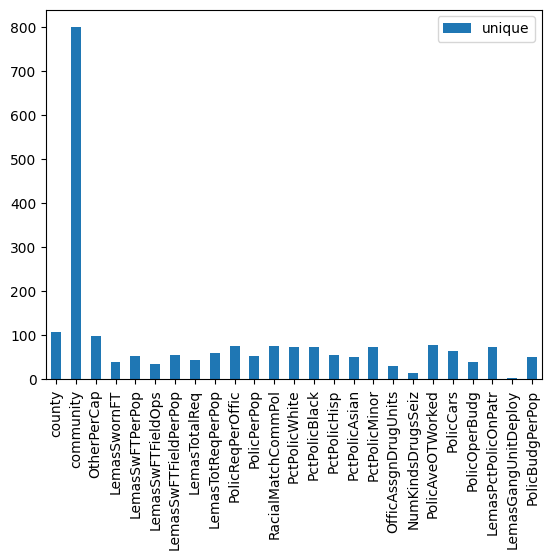

In [ ]:
#Plotting unique values for each attribute
dirty_cat_describe[["unique"]].plot(kind="bar")

<Axes: >

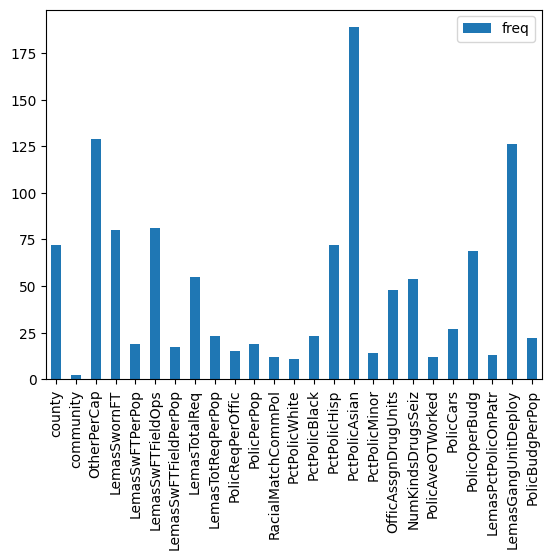

In [ ]:
#Plotting the frequency of the top value in each categorical attribute
dirty_cat_describe[["freq"]].plot(kind="bar")

<Axes: ylabel='Frequency'>

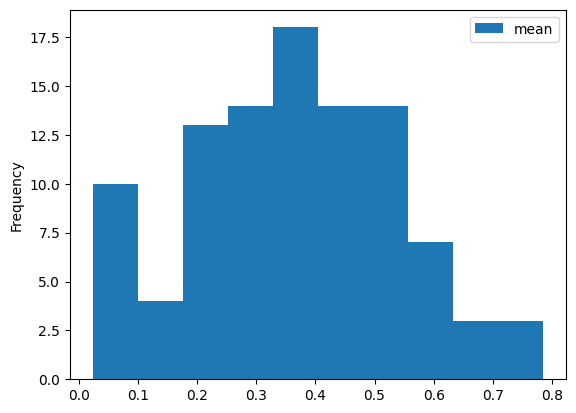

In [ ]:
#Plotting the distribution of the mean across normalized numeric attributes. The mean is fairly normally distributed.
summary_dirty[["mean"]].plot(kind="hist")

<Axes: ylabel='Frequency'>

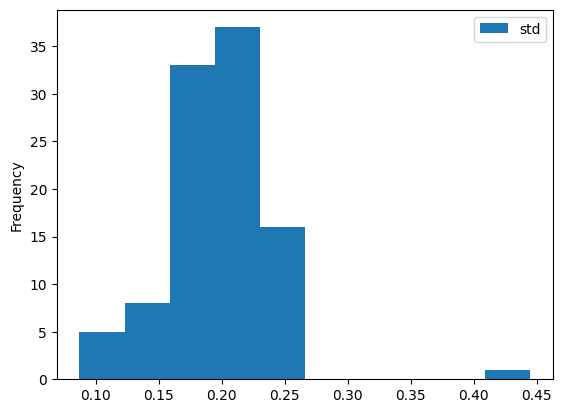

In [ ]:
#Plotting the distribution of standard deviation across normalized numeric attributes.
summary_dirty[["std"]].plot(kind="hist")

<Axes: >

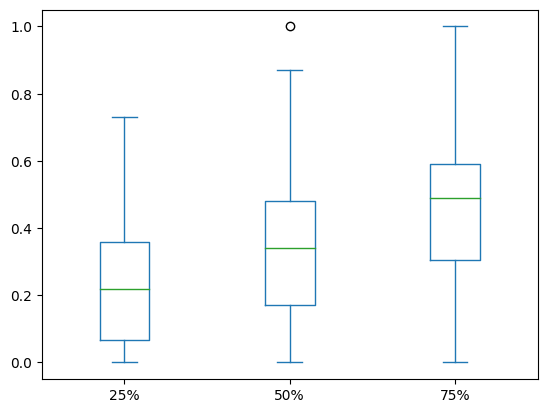

In [ ]:
#Plotting the interquartile range for normalized numeric attributes. There is only one outlier.
summary_dirty[["25%","50%","75%"]].plot(kind="box")

# Generating Initial Reports

In [ ]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [ ]:
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
dirty_df['CrimeCategory'] = pd.cut(x=dirty_df['ViolentCrimesPerPop'],
                     bins=[-0.1, 0.2, 0.4, 0.6, 0.8, 1],
                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Creating Dataframes for Model Training

In this section, I created different dataframes to test my research questions. I created two copies of my 'clean' dataset, one of which split the target value into quantiles ('Very Low', 'Low', 'Medium', 'High' and 'Very High'), and one of which replicated Ahishakiye et.al's method of splitting the target value into three classes ('Low', 'Medium', and 'High').

I then used stepwise feature elimination and VIF scores on each of these datasets to create four new datasets with features chosen based on machine learning techniques.


In [ ]:
#Splitting the target variable into 5 classes based on quantile split.
clean_df_5 = clean_df.copy()
clean_df_5['CrimeCategory'] = pd.cut(x=clean_df_5['ViolentCrimesPerPop'],
                     bins=[-0.1, 0.2, 0.4, 0.6, 0.8, 1],
                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [ ]:
#Splitting the target variable into 3 classes based on study's metrics.
clean_df_3 = clean_df.copy()
clean_df_3['CrimeCategory'] = pd.cut(x=clean_df_3['ViolentCrimesPerPop'],
                  bins=[-0.1, 0.25, 0.4, 1],
                  labels=['Low', 'Medium', 'High'])
clean_df_3.head()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,CrimeCategory
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20,Low
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67,High
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43,High
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12,Low
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03,Low


Stepwise Feature Selection

In [ ]:
#Dropping 'ViolentCrimesPerPop' so I can use 'CrimeCategory' as the new target variable for stepwise feature elimination.
df_stepwise_5 = clean_df_5.drop(['ViolentCrimesPerPop'], axis=1).copy()
df_stepwise_3 = clean_df_3.drop(['ViolentCrimesPerPop'], axis=1).copy()

In [ ]:
#Using stepwise feature selection to determine features which improve the accuracy of a classification model. (12m)
features_5 = df_stepwise_5.iloc[:, :-1]
target_5 = df_stepwise_5.iloc[:, -1]

sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features='best',
                                forward=True,
                                scoring='accuracy',
                                cv=None)
selected_features_5 = sfs.fit(features_5, target_5)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [ ]:
print(sfs.k_feature_names_)

('population', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWSocSec', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOc

In [ ]:
#Creating the new dataset based on stepwise feature elimination when 'CrimeCategory' is split into 5 classes
new_features_5 = ['population', 'householdsize', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', \
                'numbUrban', 'pctUrban', 'medIncome', 'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'medFamInc', 'perCapInc', 'whitePerCap',\
                'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',\
                'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplProfServ', 'PctOccupMgmtProf', 'MalePctDivorce', \
                'MalePctNevMarr', 'TotalPctDiv', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',\
                'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', \
                'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerRentOccHous', 'PctPersDenseHous', \
                'HousVacant', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',\
                'RentMedian', 'RentHighQ', 'MedRent', 'MedOwnCostPctInc', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState',\
                'LandArea', 'PopDens', 'LemasPctOfficDrugUn','CrimeCategory']
stepwise_df_5 = clean_df_5[new_features_5]
stepwise_df_5.head()

,population,householdsize,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,MedRent,MedOwnCostPctInc,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,LandArea,PopDens,LemasPctOfficDrugUn,CrimeCategory
0,0.19,0.33,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,...,0.34,0.46,0.04,0.0,0.12,0.42,0.12,0.26,0.32,Very Low
1,0.00,0.16,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,...,0.37,0.32,0.00,0.0,0.21,0.50,0.02,0.12,0.00,High
2,0.00,0.42,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,...,0.31,0.39,0.00,0.0,0.14,0.49,0.01,0.21,0.00,Medium
3,0.04,0.77,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,...,0.89,0.51,0.00,0.0,0.19,0.30,0.02,0.39,0.00,Very Low
4,0.01,0.55,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,...,0.38,0.51,0.00,0.0,0.11,0.72,0.04,0.09,0.00,Very Low


In [ ]:
#Using stepwise feature selection to determine features which improve the accuracy of the model. (9m)
features_3 = df_stepwise_3.iloc[:, :-1]
target_3 = df_stepwise_3.iloc[:, -1]

sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features='best',
                                forward=True,
                                scoring='accuracy',
                                cv=None)
selected_features_3 = sfs.fit(features_3, target_3)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [ ]:
print(sfs.k_feature_names_)

('state', 'racePctWhite', 'racePctHisp', 'agePct12t21', 'medIncome', 'pctWPubAsst', 'pctWRetire', 'perCapInc', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'NumUnderPov', 'PctLess9thGrade', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'HousVacant', 'PctVacantBoarded', 'PctVacMore6Mos', 'PctWOFullPlumb', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumStreet')


In [ ]:
#Creating new dataset based on stepwise feature selection when 'CrimeCategory' is split into 3 classes
new_features_3 = ['state', 'population', 'racePctWhite', 'racePctHisp', 'whitePerCap', \
                  'indianPerCap', 'HispPerCap', 'NumUnderPov', 'PctLess9thGrade', 'PctOccupManu',\
                  'PctOccupMgmtProf', 'FemalePctDiv', 'PersPerFam', 'PctKids2Par', 'PctWorkMomYoungKids',\
                  'PctWorkMom', 'PctIlleg', 'PctLargHouseFam', 'PctLargHouseOccup', 'PctPersDenseHous',\
                  'HousVacant', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart', 'NumStreet',\
                  'CrimeCategory']

stepwise_df_3 = clean_df_3[new_features_3]
stepwise_df_3.head()

,state,population,racePctWhite,racePctHisp,whitePerCap,indianPerCap,HispPerCap,NumUnderPov,PctLess9thGrade,PctOccupManu,...,PctIlleg,PctLargHouseFam,PctLargHouseOccup,PctPersDenseHous,HousVacant,PctVacantBoarded,PctVacMore6Mos,OwnOccLowQuart,NumStreet,CrimeCategory
0,8,0.19,0.90,0.17,0.39,0.27,0.41,0.08,0.10,0.25,...,0.14,0.14,0.13,0.09,0.21,0.05,0.26,0.22,0.0,Low
1,53,0.00,0.74,0.07,0.38,0.16,0.35,0.01,0.14,0.42,...,0.24,0.16,0.10,0.20,0.02,0.02,0.25,0.21,0.0,High
2,24,0.00,0.56,0.04,0.29,0.07,0.39,0.01,0.27,0.49,...,0.46,0.20,0.20,0.15,0.01,0.29,0.30,0.18,0.0,High
3,34,0.04,0.08,0.10,0.40,0.16,0.44,0.01,0.09,0.37,...,0.33,0.56,0.62,0.12,0.01,0.60,0.47,0.24,0.0,Low
4,42,0.01,0.95,0.05,0.41,0.00,0.48,0.00,0.25,0.42,...,0.06,0.16,0.19,0.02,0.01,0.04,0.55,0.31,0.0,Low


In [ ]:
stepwise_df_3.to_csv('stepwise_df_3.csv', index=False)

In [ ]:
stepwise_df_5.to_csv('stepwise_df_5.csv', index=False)

VIF Feature Elimination

In [ ]:
#Initiializing a Dataframe to store VIF values which indicate highly correlated features.
VIF = clean_df_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns

In [ ]:
#Calculating the VIF score for all features
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]

vif_data

,feature,VIF
0,const,4737.054890
1,state,1.925830
2,fold,1.053504
3,population,291.060269
4,householdsize,23.019530
...,...,...
98,PctSameState85,8.197157
99,LandArea,3.310973
100,PopDens,4.351955
101,PctUsePubTrans,3.221088


In [ ]:
#Checking the top 5 VIF scores
vif_data.sort_values(by="VIF" , ascending=False).head(5)

,feature,VIF
0,const,4737.054890
44,TotalPctDiv,1037.794324
83,OwnOccMedVal,579.578386
70,PctPersOwnOccup,570.372709
76,PctHousOwnOcc,550.717993


In [ ]:
#Dropping the 5 features with the highest VIF scores and creating a new dataframe to store selected features
vif_elimination_5 = clean_df.drop(["TotalPctDiv", "OwnOccMedVal", "PctPersOwnOccup", "PctHousOwnOcc"], axis = 1).copy()

In [ ]:
#Repeat VIF initialization on new dataframe
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns

In [ ]:
#Repeat the process to reveal features with highest VIF score in new dataframe
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]
vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,4642.661686
60,PctRecImmig8,478.255600
59,PctRecImmig5,311.714030
61,PctRecImmig10,302.109284
3,population,290.407753
13,numbUrban,280.856192


In [ ]:
#Eliminate 5 features with the highest VIF scores
vif_elimination_5 = vif_elimination_5.drop(["PctRecImmig8", "PctRecImmig5", "PctRecImmig10", "population", "numbUrban"], axis = 1).copy()


In [ ]:
#Repeat process of elimination until VIF scores for remaining features is below threshold of 10.0
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]
vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,4614.798526
60,PctLargHouseOccup,226.744414
59,PctLargHouseFam,221.919359
61,PersPerOccupHous,160.163786
21,perCapInc,146.441557
13,medIncome,143.132339


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["PctLargHouseOccup", "PctLargHouseFam", "PersPerOccupHous", "perCapInc","medIncome"], axis = 1).copy()

In [ ]:
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]
vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,4294.156576
72,RentMedian,122.038421
42,PctKids2Par,112.017672
41,PctFam2Par,111.642121
74,MedRent,85.300446
10,agePct16t24,80.301497


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["RentMedian", "PctKids2Par", "PctFam2Par", "MedRent", "agePct16t24"], axis = 1).copy()

In [ ]:
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]
vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,3463.875929
66,OwnOccLowQuart,52.744268
67,OwnOccHiQuart,48.974992
18,medFamInc,46.487216
28,PctNotHSGrad,40.819162
15,pctWSocSec,38.083897


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["OwnOccLowQuart", "OwnOccHiQuart", "medFamInc", "PctNotHSGrad", "pctWSocSec"], axis = 1).copy()

In [ ]:
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]

vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,3324.629583
70,PctForeignBorn,30.499106
36,PersPerFam,28.034742
32,PctOccupMgmtProf,27.908876
49,PctSpeakEnglOnly,27.630851
23,NumUnderPov,27.365389


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["PctForeignBorn", "PersPerFam", "PctOccupMgmtProf", "PctSpeakEnglOnly", "NumUnderPov"], axis = 1).copy()

In [ ]:
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]

vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,2801.641479
12,pctWWage,22.707741
9,agePct12t29,22.481895
49,PctPersDenseHous,20.996448
5,racePctWhite,20.400503
10,agePct65up,19.815407


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["pctWWage", "agePct12t29", "PctPersDenseHous","racePctWhite", "agePct65up"], axis = 1).copy()

In [ ]:
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]

vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,1362.164773
39,PctImmigRec8,19.057714
55,RentHighQ,18.636911
19,PctPopUnderPov,18.054947
42,PctNotSpeakEnglWell,17.212299
21,PctBSorMore,15.424087


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["PctImmigRec8", "RentHighQ", "PctPopUnderPov", "PctNotSpeakEnglWell", "PctBSorMore"], axis = 1).copy()

In [ ]:
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]

vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,1269.151462
27,FemalePctDiv,13.276949
10,pctWInvInc,12.558022
25,MalePctDivorce,12.013367
3,householdsize,11.999097
33,PctIlleg,11.079513


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["FemalePctDiv", "pctWInvInc", "MalePctDivorce", "householdsize", "PctIlleg"], axis = 1).copy()

In [ ]:
VIF = vif_elimination_5.iloc[:, :-2]
VIF = add_constant(VIF)
VIF = VIF.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i)
                          for i in range(len(VIF.columns))]

vif_data.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,845.404284
31,PctImmigRec5,10.124868
22,PctOccupManu,8.982509
27,PctWorkMom,8.505400
52,PctSameHouse85,8.428686
9,pctWPubAsst,8.249946


In [ ]:
vif_elimination_5 = vif_elimination_5.drop(["PctImmigRec5"], axis = 1).copy()

In [ ]:
#Store final dataframe in a new csv file to work on later
vif_elimination_5.to_csv('vif_elimination_5.csv', index=False)

In [ ]:
#Repeat same process for dataframe where 'CrimeCategory' is divided into 3 classes

VIF_3 = clean_df_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns

In [ ]:
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]

vif_data_3

,feature,VIF
0,const,4737.054890
1,state,1.925830
2,fold,1.053504
3,population,291.060269
4,householdsize,23.019530
...,...,...
98,PctSameState85,8.197157
99,LandArea,3.310973
100,PopDens,4.351955
101,PctUsePubTrans,3.221088


In [ ]:
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,4737.054890
44,TotalPctDiv,1037.794324
83,OwnOccMedVal,579.578386
70,PctPersOwnOccup,570.372709
76,PctHousOwnOcc,550.717993
61,PctRecImmig8,479.988551


In [ ]:
vif_elimination_3 = clean_df_3.drop(["TotalPctDiv", "OwnOccMedVal", "PctPersOwnOccup", \
                                     "PctHousOwnOcc", "PctRecImmig8"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,4618.639645
3,population,290.409267
13,numbUrban,281.144465
64,PctLargHouseOccup,228.108757
63,PctLargHouseFam,223.408808
59,PctRecImmig5,218.582035


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["population", "numbUrban", "PctLargHouseOccup",\
                                     "PctLargHouseFam", "PctRecImmig5"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,4351.495033
21,perCapInc,144.622155
13,medIncome,142.075577
60,PersPerOccupHous,137.987875
76,RentMedian,122.693177
44,PctKids2Par,116.034433


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["perCapInc", "medIncome", "PersPerOccupHous",\
                                            "RentMedian", "PctKids2Par"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,4117.611707
10,agePct16t24,79.954736
54,PctRecImmig10,72.214700
69,OwnOccLowQuart,53.823305
9,agePct12t29,52.345384
73,MedRent,50.201144


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["agePct16t24", "PctRecImmig10", "OwnOccLowQuart",\
                                            "agePct12t29", "MedRent"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,3766.264943
39,PctFam2Par,44.517667
17,medFamInc,43.376945
27,PctNotHSGrad,40.550589
14,pctWSocSec,37.628361
9,agePct65up,34.106987


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["PctFam2Par", "medFamInc", "PctNotHSGrad",\
                                            "pctWSocSec", "agePct65up"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,2473.663870
69,PctForeignBorn,29.859556
34,PersPerFam,27.870065
30,PctOccupMgmtProf,27.826825
47,PctSpeakEnglOnly,27.591219
21,NumUnderPov,27.457952


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["PctForeignBorn", "PersPerFam", "PctOccupMgmtProf", \
                                            "PctSpeakEnglOnly", "NumUnderPov"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,1976.986168
59,RentHighQ,21.553666
47,PctPersDenseHous,20.626476
5,racePctWhite,20.552907
41,PctImmigRec8,19.073404
44,PctNotSpeakEnglWell,18.847105


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["RentHighQ", "PctPersDenseHous", "racePctWhite", \
                                            "PctImmigRec8", "PctNotSpeakEnglWell"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,1386.354974
20,PctPopUnderPov,17.792139
14,whitePerCap,17.703587
9,pctWWage,15.940428
22,PctBSorMore,15.487413
24,PctEmploy,14.939718


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["PctPopUnderPov", "whitePerCap", "pctWWage", \
                                            "PctBSorMore", "PctEmploy"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,1192.576585
25,FemalePctDiv,12.537512
23,MalePctDivorce,11.979558
3,householdsize,11.262557
31,PctIlleg,11.025847
10,pctWInvInc,11.015498


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["FemalePctDiv", "MalePctDivorce", "householdsize", \
                                            "PctIlleg", "pctWInvInc"], axis = 1).copy()

In [ ]:
VIF_3 = vif_elimination_3.iloc[:, :-2]
VIF_3 = add_constant(VIF_3)
VIF_3 = VIF_3.apply(pd.to_numeric, errors='coerce')
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = VIF_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(VIF_3.values, i)
                          for i in range(len(VIF_3.columns))]
vif_data_3.sort_values(by="VIF" , ascending=False).head(6)

,feature,VIF
0,const,619.396719
29,PctImmigRec5,10.120056
20,PctOccupManu,8.761574
51,PctSameHouse85,8.316823
9,pctWPubAsst,8.238003
44,RentLowQ,7.850684


In [ ]:
vif_elimination_3 = vif_elimination_3.drop(["PctImmigRec5"], axis = 1).copy()

In [ ]:
vif_elimination_3.to_csv('vif_elimination_3.csv', index=False)